# COMP 9517

# Usama Sadiq

# z5235652

# Project Individual Part

***

## This is the first step that we have performed for this project.

### - The purpose of this script is to read the annotation files provided to us.

### - Also read the respective image

### - Extract the positive images and save them later for training the classifier

<b>Note :- In order to run this script the following should be present</b>

1) This script reads annotation file from "Data\\benchmark_velocity_train\\clips\\1\\" where Data folder is placed alongside the script

2) This script also reads image files from "Data\\benchmark_velocity_train\\clips\\1\\imgs\\040.jpg". 

<b>Note :- We will only select the 40th frame as positive images</b> 

3) The script will extract the top, left, right, bottom coords of the annotated box and using these coords, it will extract the image and save it for training. It will also resize the extracted image to 60 * 60 as we are assuming that all our positive images are of size 60 * 60

<b>Note: In order for the script to save the extracted images, it assumes that there is a directory present with the name positive imgs in the data folder</b>

***

In [1]:
#read the annotations file for one of them and extract the values of Top,right,bottom,left
#Then use these values to calculate the w and h of the images and crop this section out  and save it
#Do this for all the training and testing dataset.

import json
import cv2 as cv
import matplotlib.pyplot as plt
import os


#reading the first image as i want to just work with one image first
path_dir = "Data\\benchmark_velocity_train\\clips\\1\\"

file_name = "annotation.json"

f = open(path_dir+file_name)

annotations_img = json.load(f)

f.close()


In [2]:
print(annotations_img)

[{'velocity': [-1.2287469463, -0.0101401592], 'bbox': {'top': 340.3418273926, 'right': 868.1537475586, 'bottom': 393.3275146484, 'left': 784.6638793945}, 'position': [21.30970213, 2.7243980956]}]


In [3]:
annotations_img[0]['bbox']

{'top': 340.3418273926,
 'right': 868.1537475586,
 'bottom': 393.3275146484,
 'left': 784.6638793945}

In [4]:
#extracting the top, left, right and bottom values of the bounding box

img_top = annotations_img[0]['bbox']['top']

img_right = annotations_img[0]['bbox']['right']

img_bottom = annotations_img[0]['bbox']['bottom']

img_left = annotations_img[0]['bbox']['left']

print(img_top,img_right,img_bottom,img_left)

340.3418273926 868.1537475586 393.3275146484 784.6638793945


In [5]:
#calculate the height and width of the annotated img

h = abs(img_top - img_bottom)

w = abs(img_left - img_right)



In [6]:
print(h, w)

52.985687255799974 83.48986816410002


In [7]:
#read the image
img_file_path = "Data\\benchmark_velocity_train\\clips\\1\\imgs\\040.jpg"


img = cv.imread(img_file_path)

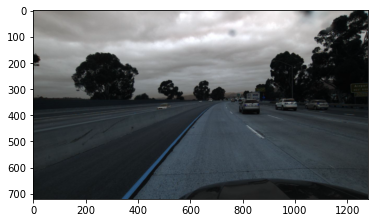

In [8]:
plt.imshow(img)
plt.show()

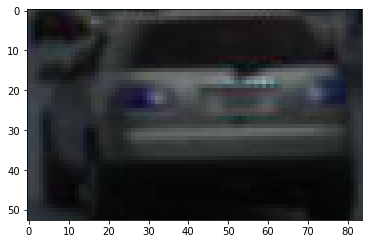

In [9]:
#coords for cropping the img (x1,y1,x2,y2)
startY = int(img_top)

endY = int(img_bottom)

startX = int(img_left)

endX = int(img_right)


cropped_img = img[startY:endY, startX: endX]

plt.imshow(cropped_img)
plt.show()

In [10]:
print(cropped_img.shape)

(53, 84, 3)


In [11]:
#save the cropped images in the positive imgs folder\dir

postive_imgs_path = "Data\\positive_imgs\\"


In [12]:
#lets extract all the positive images from the train dataset

temp_x = []

temp_y = []

def getAnnotatedFile(clip_number, postive_imgs_path):
    
    global counter
    
    global temp_x
    
    global temp_y
    
    #dir_path
    path_dir = "Data\\benchmark_velocity_train\\clips\\" + str(clip_number) + "\\"
    
    f = open(path_dir+file_name)

    annotations_img = json.load(f)

    f.close()
    
    #print(len(annotations_img))
    
    for j in range(len(annotations_img)):
        
        #print(j)
        #extracting the top, left, right and bottom values of the bbox

        img_top = annotations_img[j]['bbox']['top']

        img_right = annotations_img[j]['bbox']['right']

        img_bottom = annotations_img[j]['bbox']['bottom']

        img_left = annotations_img[j]['bbox']['left']

        #print(img_top,img_right,img_bottom,img_left)
    
        img_file_path = path_dir + "imgs\\040.jpg"
        
        
        img = cv.imread(img_file_path)
    
    
        #calculate the height and width of the annotated img

        h = abs(img_top - img_bottom)

        w = abs(img_left - img_right)
    
        #plt.imshow(img)
        #plt.show()
    
        #coords for cropping the img (x1,y1,x2,y2)
        startY = int(img_top)

        endY = int(img_bottom)

        startX = int(img_left)

        endX = int(img_right)


        cropped_img = img[startY:endY, startX: endX]

        #plt.imshow(cropped_img)
        #plt.show()
        
        #print(cropped_img.shape)
        
        if cropped_img.shape[0] > 0 and cropped_img.shape[1] > 0:
            
            temp_x.append(cropped_img.shape[0])
            
            temp_y.append(cropped_img.shape[1])
            
            
            dim = (60,60)
            
            resized = cv.resize(cropped_img, dim, interpolation = cv.INTER_AREA)
            
            saved_pwd = os.getcwd()

            os.chdir(postive_imgs_path)

            #print(os.getcwd())

            #print(str(counter) + ".png")

            #cv.imwrite(str(counter) + ".png",resized)

            os.chdir(saved_pwd)

            #print(os.getcwd())

            counter = counter + 1
    

counter = 0

for i in range(1,1075):
    
    getAnnotatedFile(i, postive_imgs_path)
    

print("done.......")

done.......


In [15]:
print(max(temp_x))

421


In [16]:
print(max(temp_y))

389


In [17]:
print(min(temp_x))

15


In [18]:
print(min(temp_y))

17


In [20]:
print(sum(temp_x) // len(temp_x))

39


In [21]:
print(sum(temp_y) // len(temp_y))

54
